# Numerische Integration

## Auftrag
* Beschreiben Sie den Begriff des bestimmten Integrales.
* Beschreiben Sie die Sekantenzrapezregel, die Tangententrapezregel und die Simpsonsche Regel als Näherungsformel für zur Berechnung bestimmter Integrale.
* Erstellen Sie drei Python-Funktionen zur Approximation des Integrals $\int_{a}^{b} f(x) dx$ dabei steht $n$ für die Anzahl Streifen (bzw Doppelstreifen bei Simpson) in den Approximationen.
  * `sekanten_trapez_regel(f, a, b, n)`
  * `tangenten_trapez_regel(f, a, b, n)`
  * `simpson_regel(f, a, b, n)`
* Verwenden Sie die drei Approximationsregeln zur Bestimmung der folgenden Integrale (Varieren Sie dabei die Anzahl Streifen $n$):
  * $\int_{0}^{\pi} sin(x) dx$
  * $\int_{-1}^{1} \sqrt{1-x^2} dx$
  * $\int_{0}^{1} x^2 dx$
* Stellen Sie Vermutungen auf, was beim Grenzwert $n\to\infty$ passiert.
* Überprüfen Sie Ihre Vermutungen mit Sympy.
* Vergleichen Sie die Genauigkeit der gemachten Approximationen.

## Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.
* SymPy
* PrettyTable
* Matplotlib


In [36]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [37]:
 pip install PTable

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### SymPy
**SymPy** ist eine Python-Programmierbibliothek für symbolische mathematische Berechnungen.
### PrettyTable
**PrettyTable** ist eine Python-Programmierbibliothek die es ermöglicht einfach ASCII-Tabellen mittels Python zu generieren.
### Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, sodass sie für fast alle Anwendungsbereiche geeignet sind

## Bestimmtes Integral
Die Integralrechnung gehört zu den wichtigsten Zweigen der Analysis. Mittels einem Integral können Flächenstücke zwischen dem Funktionsgraphen und der x-Achse berechnet werden. Das Integral ist ein Oberbegriff für das unbestimmte und das bestimmte Integral.  
Das bestimmte Integral einer Funktion ordnet dieser einer Zahl zu und wird verwendet, wenn für eine Funktion keine Stammfunktion bestimmt werden kann. Weiterhin kann die numerische Methode verwendet werden, wenn nur Messpunkte und keine Funktion vorliegt. Es gibt verschiedene numerische Methoden. In dieser Arbeit wird auf die folgenden Methoden eingegangen:    

* Trapezregel
* Simpsonische Regel  

Beim bestimmten Integral wird der Inhalt der Fläche unter einem Graphen im Intervall $a \leq x \leq b$ bestimmt.  

![Bild 1](img/Integral.png)   
"[Bild 1] Darstellung des Integrals als Flächeninhalt $S$ unter dem Graphen einer Funktion $f$ im bestimmten Integrationsbereich von $a$ bis $b$"  

Das unbestimmte Integral einer Funktion ordnet dieser eine Menge von Funktionen zu, deren Elemente Stammfunktionen genannt werden. Dabei besitzt ein unbestimmtes Integral im Gegensatz des bestimmten Integrals keine obere und untere Grenze. In dieser Arbeit wird nicht weiter auf das unbestimmte Integral eingegangen.

## Trapezregel
Bei der Trapezregel wird die Fläche unter dem Gaphen im Bereich $a \leq x \leq b$ in $n$ gleich breite Teilintervalle aufgeteilt. Pro Intervall wird zwischen den beiden Eckpunkten $x_i$ und $x_{i+1}$ eine Gerade gezogen, damit ein Trapez ensteht. Je höher die Anzahl der Teilintervalle gewählt wird, desto genauer ist die Annäherung der Fläche.     
Die Trapezregel kann als Sehnentrapezformel oder Tangententrapezformel angewannt werden.

### Sehnentrapezformel
Bei der Sehnentrapezformel wird das Trapez aus der Grundlinie $[a,b]$, den senkrechten Geraden $[a, f(a)]$ und $[f(b)]$ sowie der Sehne als Verbindungsgerade zwischen $f(a)$ und $f(b)$. Die Sehne ersetzt an dieser Stelle die Kurve $f(x)$.  

![Bild 2](img/Sehnentrapezformel.png)  
"[Bild 2] Sehnentrapezformel"

Ein Trapez berechnet sich somit mit folgender Formel:  
$$Q(f)=\frac{a-b}{2}*(f(a)+f(b))$$  
Um das Integral noch besser annähern zu können, wird das Integrall $[a,b]$ in $n$ nebeneinanderliegende gleich grosse Teilintervalle der Länge $h$. Für jede einzelne Teilinterall wendet man die Sehentrapezformel an und berechnet die Teilfläche und summiert diese Teilflächen zusammen.
Daraus ergibt sich die Sehentrapezformel:
$$Q(f)=h*(\frac{1}{2}*f(a)+\frac{1}{2}*f(b)+\sum_{i=1}^{n-1}f(a+i*h))$$  
$$h=\frac{b-a}{n}$$

### Implementierung der Sehnentrapezformel
Die Annäherung mittels der Sehnentrapezformel wurde im nachfolgenden Sippet `sekanten_trapez_regel(f, a, b, n)` umgesetzt.

In [39]:
def sekanten_trapez_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Sehnentrapezformel.
        @param: Funktion f: sympy-Funktion die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b und unterhalb des Integrals
    """
    
    # Länge der Abschnitte berechnen
    h = (b - a) / n

    # Funktionwerte von a und b berechnen
    f_a = f.subs(x, a)
    f_b = f.subs(x, b)

    # Summe aller Teilfunktionwerte berechnen
    summe = 0
    for i in range(1, n):
        f_ai = f.subs(x, (a + i*h))
        summe += f_ai
    
    # Zwischenschritte zusammenrechner (Sehnentrapezformel)
    return h * (f_a/2 + f_b/2 + summe)

### Tangententrapezformel
Bei der Tangententrapezformel wird die obere Seite des Trapezes in der Mitte des Intervalles $[a,b]$ als Tangete von $f(x)$ gelegt. Die restlichen Seiten sind die Grundlinie $[a,b]$ und die senkrechte Gerande an der Stelle $a$ und $b$ bis zur Tangente.

![Bild 3](img/Tangententrapezformel.png) "[Bild 3] Tangententrapezformel"

Daraus ergibt sich die Tangententrapezformel:
$$Q(f)=(b-a)*f(\frac{a+b}{2})$$  
Wie bei der Sehnentrapezformel wird auch hier um eine bessere Annäherung zu erreichen das Intervall $[a,b]$ in $n$ nebeneinanderliegendne gleich grosse Teilintervalle der Länge $h$ geteilt. Die einzelnen Teilflächen werden zusammenadiert womit es einen genaueren Näerung ergibt.  
Daraus ergibt sich die Tagententrapezformel:
$$Q(f)=h*\sum_{i=1}^{n}f(a+h*\frac{2i-1}{2})$$  
$$h=\frac{b-a}{n}$$

### Implementierung der Tangententrapezformel
Die Annäherung mittels der Tangententrapezformel wurde im nachfolgenden Sippet `tangenten_trapez_regel(f, a, b, n)` umgesetzt.

In [40]:
def tangenten_trapez_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Tangententrapezformel.
        @param: Funktion f: sympy-Funktion die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b und unterhalb des Integrals
    """
    
    # Länge der Abschnitte berechnen
    h = (b - a) / n

    # Summe aller Teilfunktionwerte berechnen
    summe = 0
    for i in range(1, n + 1):
        f_ai = f.subs(x, (a + h * ((2*i - 1) / 2)))
        summe += f_ai
    
    # Zwischenschritte zusammenrechner (Tagententrapezformel)
    return h*summe

## Simpsonsche Regel
Die Simpsonsche Regel funktioniert ähnlich wie die Trapezregel. Hier werden jedoch die Eckpunkte nicht durch eine Gerade, sondern durch eine Parabel verbunden. Somit wird in der Regel eine bessere Annäherung der Fläche gegenüber der Trapezregel erzielt.  

![Bild 4](img/Simpsonscheregel.png)  
"[Bild 4] Simpsonsche Regel"

Ein Intervall lässt sich berechnen mit:  
$$Q(f)=\frac{b-a}{6}*(f(a)+4*f(\frac{a+b}{2})+f(b))$$  
Um die gesamte Fläche im Intervall zu erhalten, müssen die einzelnen Intervalle ebenfalls wieder als Summe berechnet werden:  
$$Q(f)=\frac{h}{3}*(\frac{1}{2}*f(x_0)+\sum_{k=1}^{n-1}f(x_k)+2*\sum_{k=1}^{n}f(\frac{x_{k-1}+x_k}{2})+\frac{1}{2}*f(x_n))$$  
$$h=\frac{b-a}{n}, x_k=a+k*h$$

### Implementierung der Simpsonsche Regel
Die Annäherung mittels der Simpsonsche Regel wurde im nachfolgenden Sippet `simpson_regel(f, a, b, n)` umgesetzt.

In [41]:
def simpson_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Simpsonsche Regel.
        @param: Funktion f: sympy-Funktion die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b und unterhalb des Integrals
    """
        
    # Länge der Abschnitte berechnen
    h = (b - a) / n
    
    # Funktionwerte von x0 und xn berechnen
    f_x0 = f.subs(x, a)
    f_xn = f.subs(x, b)

    # Summe erster Teilfunktionwerte berechnen
    summe_1 = 0
    for k in range(1, n):
        f_xk = f.subs(x, (a + k*h))
        summe_1 += f_xk
        
    # Summe zweiter Teilfunktionwerte berechnen
    summe_2 = 0
    for k in range(1, n + 1):
        xk = (a + k*h)
        xk_1 = (a + (k-1)*h)
        f_xk = f.subs(x, ((xk_1 + xk) / 2))
        summe_2 += f_xk
    
    # Zwischenschritte zusammenrechner (Simpsonsche Regel)
    return (h/3) * (f_x0/2 + summe_1 + 2*summe_2 + f_xn/2) 

## Approximationsregeln miteinander Vergleichen
Für den Vergleich werden die drei Funktionen der Aufgabenstellung verwendet und jeweils die Fläche für verschieden Anzahl an Abschnitten berechnet.  
  * `funktion_1`: $\int_{0}^{\pi} sin(x) dx$
  * `funktion_2`: $\int_{-1}^{1} \sqrt{1-x^2} dx$
  * `funktion_3`: $\int_{0}^{1} x^2 dx$


+------------+--------------------+-----------------------+-------------------+
| Abschnitte | Sehnentrapezformel | Tangententrapezformel | Simpsonsche Regel |
+------------+--------------------+-----------------------+-------------------+
|     1      |     0.00000000     |       3.14159265      |     2.09439510    |
|     2      |     1.57079633     |       2.22144147      |     2.00455975    |
|     3      |     1.81379936     |       2.09439510      |     2.00086319    |
|     4      |     1.89611890     |       2.05234431      |     2.00026917    |
|     5      |     1.93376560     |       2.03328148      |     2.00010952    |
|     6      |     1.95409723     |       2.02303032      |     2.00005262    |
|     7      |     1.96631668     |       2.01688418      |     2.00002834    |
|     8      |     1.97423160     |       2.01290909      |     2.00001659    |
|     9      |     1.97965081     |       2.01019012      |     2.00001035    |
|     10     |     1.98352354     |     

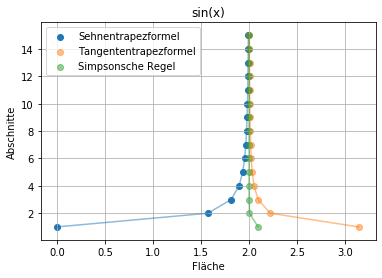

+------------+--------------------+-----------------------+-------------------+
| Abschnitte | Sehnentrapezformel | Tangententrapezformel | Simpsonsche Regel |
+------------+--------------------+-----------------------+-------------------+
|     1      |     0.00000000     |       2.00000000      |     1.33333333    |
|     2      |     1.00000000     |       1.73205081      |     1.48803387    |
|     3      |     1.25707872     |       1.66047466      |     1.52600935    |
|     4      |     1.36602540     |       1.62968366      |     1.54179758    |
|     5      |     1.42383672     |       1.61321211      |     1.55008698    |
|     6      |     1.45877669     |       1.60320633      |     1.55506312    |
|     7      |     1.48177453     |       1.59659738      |     1.55832310    |
|     8      |     1.49785453     |       1.59196461      |     1.56059458    |
|     9      |     1.50961592     |       1.58856947      |     1.56225162    |
|     10     |     1.51852441     |     

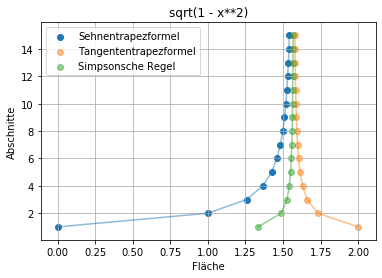

+------------+--------------------+-----------------------+-------------------+
| Abschnitte | Sehnentrapezformel | Tangententrapezformel | Simpsonsche Regel |
+------------+--------------------+-----------------------+-------------------+
|     1      |     0.50000000     |       0.25000000      |     0.33333333    |
|     2      |     0.37500000     |       0.31250000      |     0.33333333    |
|     3      |     0.35185185     |       0.32407407      |     0.33333333    |
|     4      |     0.34375000     |       0.32812500      |     0.33333333    |
|     5      |     0.34000000     |       0.33000000      |     0.33333333    |
|     6      |     0.33796296     |       0.33101852      |     0.33333333    |
|     7      |     0.33673469     |       0.33163265      |     0.33333333    |
|     8      |     0.33593750     |       0.33203125      |     0.33333333    |
|     9      |     0.33539095     |       0.33230453      |     0.33333333    |
|     10     |     0.33500000     |     

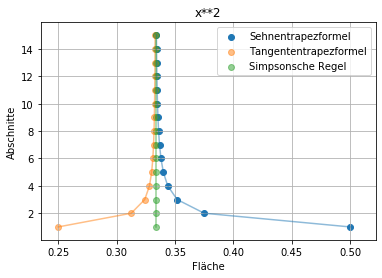

In [71]:
import math
import sympy as sp
import matplotlib.pyplot as plt
from prettytable import PrettyTable

"""
Berechnet für die definierten Funktionen die Flächen für die festgelegten Abschnitte. 
Berechnung erfolgt für jede Funktion mittels:
* Sehnentrapezformel
* Tangententrapezformel
* Simpsonsche Regel
Die Dahrstellung der Resultate erfolgt Tabelarisch und mittels eines Scatterplots.
@param: list abschnitte: Berechnung der Fläche mittels der Anzahl an Abschnitten
"""

# abschnitte = [1, 2, 4, 8, 16, 32, 64, 128, 265, 512, 1024]
abschnitte = range(1, 16)

x = sp.Symbol('x')

# Zu analysierende Funktionen
funktion_1 = sp.sin(x)
funktion_2 = sp.sqrt(1-x**2)
funktion_3 = x**2

# Funktionen mit Start- und Endwert
funktionen = [(funktion_1, 0, math.pi), 
              (funktion_2, -1, 1), 
              (funktion_3, 0, 1),]

for f, a, b in funktionen:
    sehnentrapezformel = list()
    tangententrapezformel = list()
    simpsonsche_regel = list()

    # Tabelle initialisieren
    tabelle = PrettyTable()
    tabelle.field_names = ["Abschnitte", "Sehnentrapezformel", "Tangententrapezformel", "Simpsonsche Regel"]
    
    # Berechnung für jede Formel und Abschnitt durchführen
    for index, value in enumerate(abschnitte):
        sehnentrapezformel.append(sekanten_trapez_regel(f, a, b, value))
        tangententrapezformel.append(tangenten_trapez_regel(f, a, b, value))
        simpsonsche_regel.append(simpson_regel(f, a, b, value))
        tabelle.add_row([value, 
                         '{:.8f}'.format(float(sehnentrapezformel[index])),
                         '{:.8f}'.format(float(tangententrapezformel[index])),  
                         '{:.8f}'.format(float(simpsonsche_regel[index]))])
    
    # Tabelle darstellen und löschen füf nächste Funktion
    print(tabelle)
    tabelle.clear_rows()
    
    # Scatterplot erstellen
    plt.title(f)
    plt.xlabel('Fläche')
    plt.ylabel('Abschnitte')
    plt.grid(True)
    
    plt.scatter(sehnentrapezformel, abschnitte, label="Sehnentrapezformel")
    plt.plot(sehnentrapezformel, abschnitte, alpha=0.5)
    plt.scatter(tangententrapezformel, abschnitte, label="Tangententrapezformel", alpha=0.5)  
    plt.plot(tangententrapezformel, abschnitte, alpha=0.5)
    plt.scatter(simpsonsche_regel, abschnitte, label="Simpsonsche Regel", alpha=0.5) 
    plt.plot(simpsonsche_regel, abschnitte, alpha=0.5)
    
    plt.legend()
    plt.show()

Wie in den Tabellen zu sehen ist, ist jeweils die Simpsonsche Regel mit weniger Abschnitten gennauer als die Trapezregeln. Dies deckt sich auch mit der Aussage aus dem Paper (Mathi.uni-heidelberg). Ebenfalls ist gut ersichtlich, dass sich bei allen drei Verfahren der Fehler minimiert lässt, indem höhere Anzahl an Teilintervallen $n$ gewählt wird. Das gleiche Verhalten ist in den Grafiken wieder zufinden. Spannend ist, dass sich die *Tangententrapezformel* und *Sehnentrapezformel* sich annähern, jedoch nie von der gleichen Seite aus.

## Grenzwerte von $n\to\infty$
TODO

Daraus ergibt sich die Sehentrapezformel:
$$Q(f)=h*(\frac{1}{2}*f(a)+\frac{1}{2}*f(b)+\sum_{i=1}^{n-1}f(a+i*h))$$  
$$h=\frac{b-a}{n}$$

In [106]:
from sympy import *
import math

x = sp.Symbol('x')

funktion_1 = sp.sin(x)

limit(sekanten_trapez_regel(funktion_1, 0, math.pi, x), x, oo)

TypeError: 'Symbol' object cannot be interpreted as an integer

## Fazit
TODO
Python ist eine erstaunliche Programmiersprache. Im Laufe dieses Moduls war ich immer wieder überrascht wie einfach und schnell man mathematische Probleme damit lösen kann. Besonders gut gefallen hat mir, wie einfach man sie als Einsteiger lernen kann, sie aber trotzdem auch für fortgeschrittene Anwender noch einiges zu bieten hat. Die vielen Libraries unterstützen den Anwender dabei, bereits bekannte Probleme schnell und effizient zu lösen. Da zahlreiche Lösungen abgerufen werden können, muss man diese nicht jedes Mal von Neuem programmieren.

## Litaraturverzeichnis
https://mathepedia.de/Trapezregel.html  
https://mathepedia.de/Simpsonsche_Formel.html  
https://de.wikipedia.org/wiki/Simpsonregel  
https://de.wikipedia.org/wiki/Numerische_Integration#/media/Datei:Integral_as_region_under_curve.svg  
Matplotlib. (2019). *Matplotlib*. Abgerufen am 19.03.2020 von https://matplotlib.org/  
https://pypi.org/project/PTable/   
https://www.sympy.org/en/index.html  
https://www.mathi.uni-heidelberg.de/~thaeter/anasem08/Isenhardt.pdf